# Import Data


In [47]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install xlrd
%pip install scikit-learn
%pip install seaborn



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is a

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
import seaborn as sns  # สร้างกราฟ Boxplot
from scipy.stats import zscore

%matplotlib inline


In [49]:
# Define the directory to search for CSV and XLS files
directory = Path(r'./dataset/')
# Find all CSV and XLS files in the directory and its subdirectories
csv = list(directory.rglob('*.csv'))
xls = list(directory.rglob('*.xls'))

files = csv + xls

In [50]:
# import urllib.parse
# dataset_repo = "https://github.com/kittizz/water_quality_data_collection/raw/main/"
csv_files = list()
xls_files = list()
for index in range(len(files)):
    file = files[index]
    if "63" in file.name:
        # if file.name.endswith(".csv"):
        #     csv_files.append(dataset_repo+urllib.parse.quote(str(file)))
        # if file.name.endswith(".xls"):
        #     xls_files.append(dataset_repo+urllib.parse.quote(str(file)))

        if file.name.endswith(".csv"):
            csv_files.append(str(file))
        if file.name.endswith(".xls"):
            xls_files.append(str(file))

In [51]:
df1 = pd.concat([pd.read_csv(f, encoding='utf-8')
                 for f in csv_files])
df2 = pd.concat([pd.read_excel(f)
                 for f in xls_files])

df_concat = pd.concat([df1, df2], axis=0)

# Preprocessing - Data Cleaning


In [52]:
df_concat.shape


(418131, 11)

In [53]:
df_concat


,สถานี,วันที่-เวลา,pH,DO,EC,Temp,หมายเลข,Salinity,Turbidity,BOD,COD
0,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 00:00,-,2.300,464.700,28.3,NaN,NaN,NaN,NaN,NaN
1,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 00:30,-,2.300,463.100,28.3,NaN,NaN,NaN,NaN,NaN
2,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 01:00,-,2.300,464.200,28.3,NaN,NaN,NaN,NaN,NaN
3,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 01:30,-,2.300,466.700,28.3,NaN,NaN,NaN,NaN,NaN
4,นครชัยศรี จ.นครปฐม (121),1 ม.ค.2563 02:00,-,2.300,468.200,28.2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10215,NaN,31 ก.ค.2563 21:30,8.1,4.9,238.2,30.7,222.0,0.1,,NaN,NaN
10216,NaN,31 ก.ค.2563 22:00,8.1,4.9,237.4,30.7,222.0,0.1,,NaN,NaN
10217,NaN,31 ก.ค.2563 22:30,8.1,4.9,236.7,30.7,222.0,0.1,,NaN,NaN
10218,NaN,31 ก.ค.2563 23:00,8.1,4.9,237.5,30.7,222.0,0.1,,NaN,NaN


In [54]:
df = df_concat.copy()


In [55]:
df.columns


Index(['สถานี ', 'วันที่-เวลา', 'pH', 'DO', 'EC', 'Temp', 'หมายเลข',
       'Salinity', 'Turbidity', 'BOD', 'COD'],
      dtype='object')

## missing value


In [56]:
# ตรวจสอบ missing value
df.isnull().sum()


สถานี          352596
วันที่-เวลา         0
pH                  0
DO                  0
EC                  0
Temp                0
หมายเลข         65535
Salinity       181163
Turbidity      249931
BOD            341389
COD            341389
dtype: int64

In [57]:
# ลบ column ที่เป็นภาษาไทย และ วันที่ทิ้งไป
df = df[['pH', 'DO', 'EC', 'Temp',
         'Salinity', 'Turbidity', 'BOD', 'COD']]


In [58]:
# นับจำนวนข้อมูลที่ไม่เป็น missing value ของ column  pH, DO, EC, Temp
df[['pH', 'DO', 'EC', 'Temp']].notnull().all(axis=1).sum()


418131

In [59]:
# ลบ column Salinity, Turbidity, BOD, COD ทิ้งไป เพราะว่ามีข้อมูลไม่ครบจากทุก dataset
df.drop(columns=['Salinity', 'Turbidity',
        'BOD', 'COD'], inplace=True)


In [60]:
# ตรวจสอบจำนวน missing value
df.isna().sum()


pH      0
DO      0
EC      0
Temp    0
dtype: int64

In [61]:
# ลบข้อมูลที่มี missing value ออกไป
df.dropna(inplace=True)


In [62]:
# ตรวจสอบจำนวน missing value
df.isnull().sum()


pH      0
DO      0
EC      0
Temp    0
dtype: int64

In [63]:
# แปลงตัวเลขที่เป็น string ให้เป็นตัวเลข และ เปลี่ยนตัวอักษรที่ไม่ถูกต้องให้เป็น NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [64]:
# ลบข้อมูลที่มี missing value ออกไป
df.dropna(inplace=True)


In [65]:
df.isnull().sum()


pH      0
DO      0
EC      0
Temp    0
dtype: int64

In [66]:
# เปลี่ยนชนิดข้อมูลให้เป็น float
df = df.astype(float)

# เปลี่ยนชนิดข้อมูลให้ pH เป็น int
df['pH'] = df['pH'].astype(int)


In [67]:

# df = df.iloc[:].apply(lambda x: x.round(2))


In [68]:
# reset index
df = df.reindex()


## Outlier data


In [69]:
# แสดงค่าสถิติพื้นฐาน
df.describe()


,pH,DO,EC,Temp
count,319952.000000,319952.000000,319952.000000,319952.000000
mean,5.823480,4.425241,1050.342042,29.592894
std,2.205455,2.438073,7180.436664,3.602120
min,-2.000000,0.000000,0.000000,-105.000000
25%,5.000000,2.400000,230.300000,28.048200
50%,6.000000,4.500000,316.500000,29.968500
75%,7.000000,6.400000,473.690000,31.600000
max,14.000000,19.350000,100000.000000,200.000000


<Axes: >

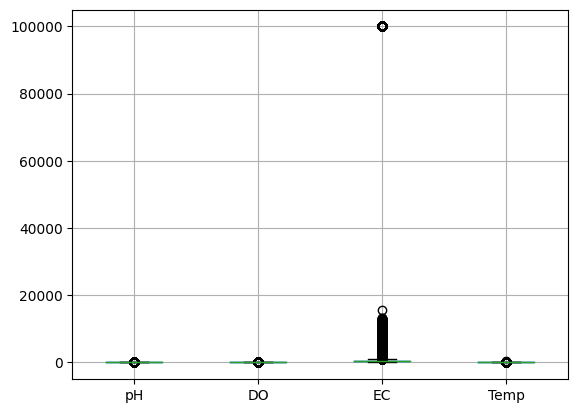

In [70]:
df.boxplot()


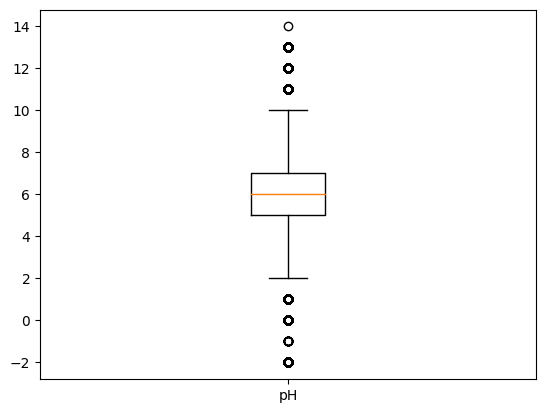

In [71]:
# แสดง box plot เพื่อตรวจสอบ Outlier Data
plt.boxplot(df['pH'], labels=['pH'])
plt.show()


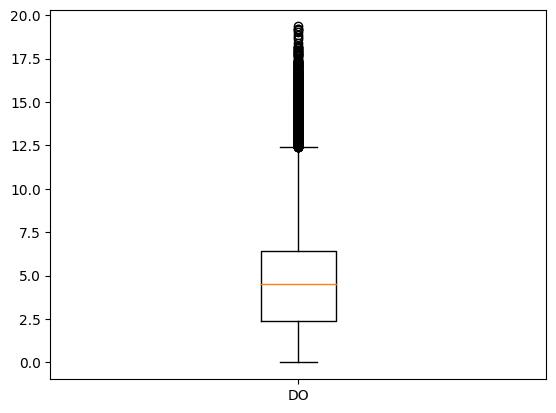

In [72]:
plt.boxplot(df['DO'], labels=['DO'])
plt.show()


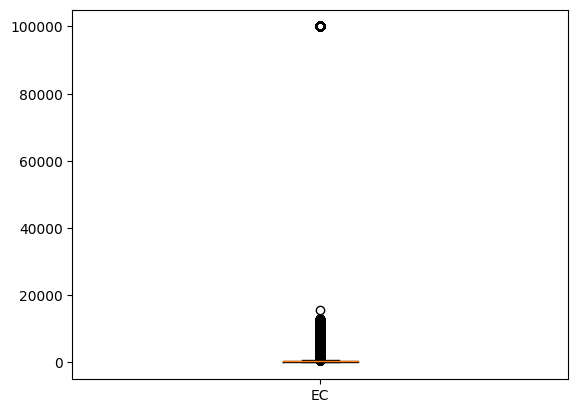

In [73]:
plt.boxplot(df['EC'], labels=['EC'])
plt.show()


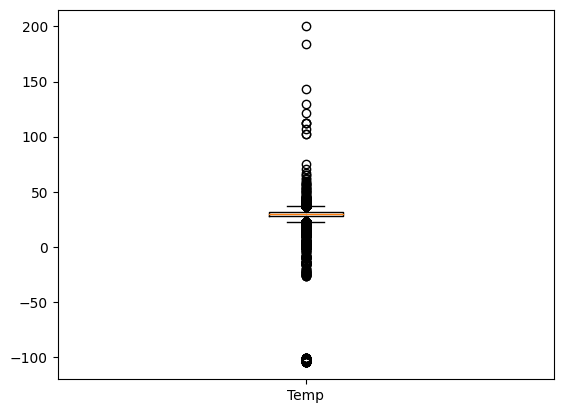

In [74]:
plt.boxplot(df['Temp'], labels=['Temp'])
plt.show()


จัดการ outlier data


In [75]:
def remove_outlier(df_in, col_name):
    q1 = np.quantile(df_in[col_name], 0.25)
    q3 = np.quantile(df_in[col_name], 0.75)
    iqr = q3-q1  # Interquartile range
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    print('Lower bound: ', fence_low)
    print('Upper bound: ', fence_high)
    df_out = df_in.loc[(df_in[col_name] > fence_low) &
                       (df_in[col_name] < fence_high)]
    return df_out


Lower bound:  2.0
Upper bound:  10.0


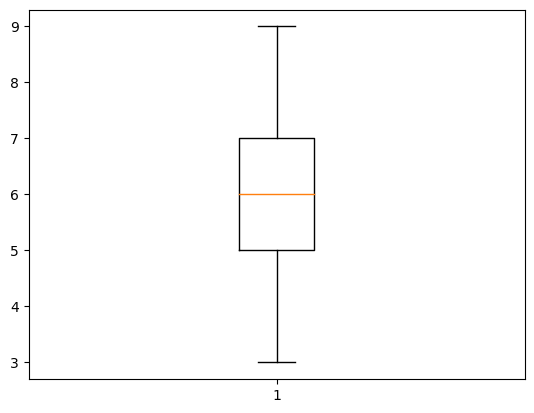

In [76]:
df_out = df.copy()
df_out = remove_outlier(df_out, 'pH')

plt.boxplot(df_out['pH'])
plt.show()


Lower bound:  -3.5561625000000006
Upper bound:  12.3269375
Lower bound:  -3.492600000000001
Upper bound:  12.221


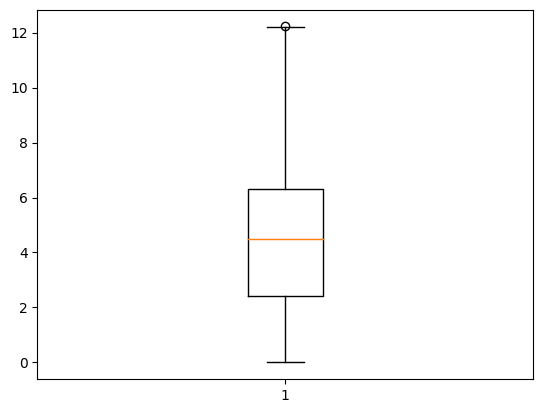

In [77]:

df_out = remove_outlier(df_out, 'DO')
df_out = remove_outlier(df_out, 'DO')
plt.boxplot(df_out['DO'])
plt.show()


Lower bound:  -100.25000000000006
Upper bound:  796.95
Lower bound:  -63.97
Upper bound:  721.582
Lower bound:  -58.30000000000001
Upper bound:  709.7
Lower bound:  -56.49999999999997
Upper bound:  705.9
Lower bound:  -56.107500000000016
Upper bound:  704.8645
Lower bound:  -55.950000000000045
Upper bound:  704.45
Lower bound:  -55.950000000000045
Upper bound:  704.45


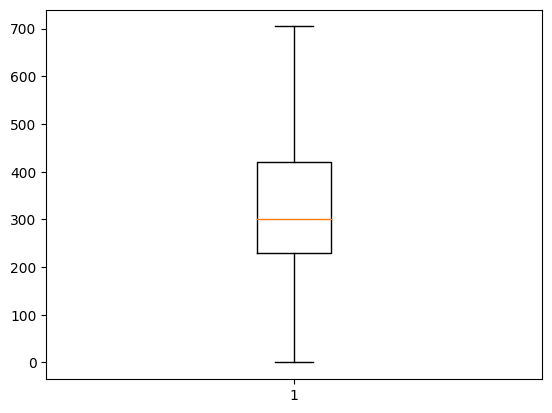

In [78]:

df_out = remove_outlier(df_out, 'EC')
df_out = remove_outlier(df_out, 'EC')
df_out = remove_outlier(df_out, 'EC')
df_out = remove_outlier(df_out, 'EC')
df_out = remove_outlier(df_out, 'EC')
df_out = remove_outlier(df_out, 'EC')
df_out = remove_outlier(df_out, 'EC')
# df_out = remove_outlier(df_out, 'EC')
# df_out = remove_outlier(df_out, 'EC')
plt.boxplot(df_out['EC'])
plt.show()


Lower bound:  22.299999999999997
Upper bound:  36.7
Lower bound:  22.800187499999993
Upper bound:  36.399887500000006
Lower bound:  23.049999999999997
Upper bound:  36.25


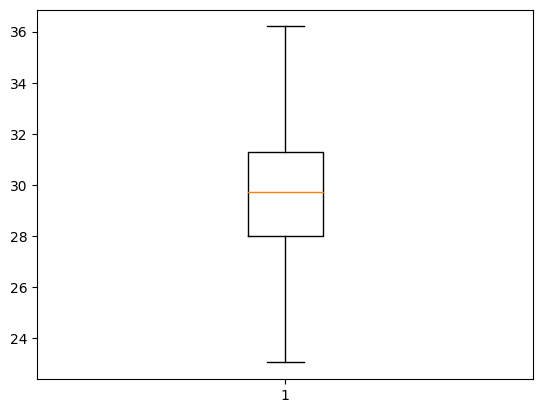

In [79]:

df_out = remove_outlier(df_out, 'Temp')
df_out = remove_outlier(df_out, 'Temp')
df_out = remove_outlier(df_out, 'Temp')
# df_out = remove_outlier(df_out, 'Temp')
# df_out = remove_outlier(df_out, 'Temp')
plt.boxplot(df_out['Temp'])
plt.show()


## duplicate data


In [80]:
print('จำนวน Duplicate Data df:', df.duplicated().sum())


จำนวน Duplicate Data df: 46043


In [81]:
# ลบ Duplicate Data
df = df.drop_duplicates()


In [82]:
df_split_copy = df.copy()


## แบ่งชุดข้อมูล


In [83]:
# seed สุ่มข้อมูล
seed = 5712
# แบ่งชุดข้อมูลออกเป็น test
df_split, df_test = train_test_split(
    df_split_copy, test_size=0.0001, random_state=seed)

# บ่งชุดข้อมูลออกเป็น  validation
df_split, df_valid = train_test_split(
    df_split, test_size=0.0001, random_state=seed)

# บ่งชุดข้อมูลออกเป็น  training
df_split, df_train = train_test_split(
    df_split, test_size=0.01, random_state=seed)


In [84]:
# จำนวนชุดข้อมูล
print('จำนวนชุดข้อมูลทั้งหมด :', len(df))
print('จำนวนชุดข้อมูล training :', len(df_train))
print('จำนวนชุดข้อมูล validation :', len(df_valid))
print('จำนวนชุดข้อมูล test :', len(df_test))


จำนวนชุดข้อมูลทั้งหมด : 273909
จำนวนชุดข้อมูล training : 2739
จำนวนชุดข้อมูล validation : 28
จำนวนชุดข้อมูล test : 28


## Data Transformation: Normalization


In [85]:
def minmaxNorm(Data, _min, _max):
    Data_Norm = (Data - _min)/(_max - _min)
    return Data_Norm


def min4norm(Data):
    _min = Data.min(axis=0, keepdims=True)
    return _min


def max4norm(Data):
    _max = Data.max(axis=0, keepdims=True)
    return _max


# KNN


In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, :1]
X_valid = df_valid.iloc[:, 1:]
Y_valid = df_valid.iloc[:, :1]
X_test = df_test.iloc[:, 1:]
Y_test = df_test.iloc[:, :1]

# สร้างโมเดล KNNC
model = KNeighborsClassifier(n_neighbors=3)

# ฝึกโมเดลด้วยชุด Train
model.fit(X_train,  Y_train.values.ravel())

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด test

Y_pred = model.predict(X_test)

# Evaluating Model KNNC

# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(Y_test, Y_pred)

print(f"KNNC Accuracy: {accuracy}")


KNNC Accuracy: 0.32142857142857145


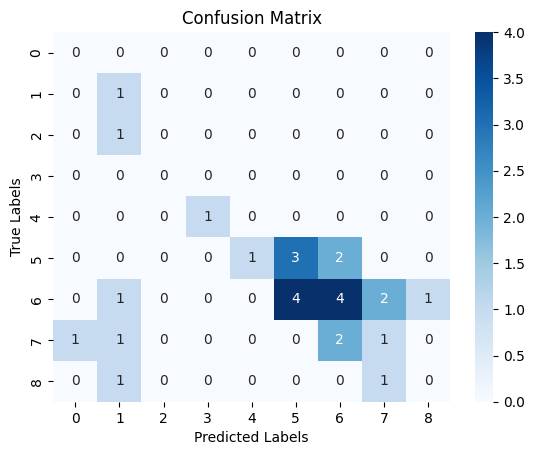

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Naive bayes


In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [89]:
X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, :1]
X_valid = df_valid.iloc[:, 1:]
Y_valid = df_valid.iloc[:, :1]
X_test = df_test.iloc[:, 1:]
Y_test = df_test.iloc[:, :1]


In [90]:
# สร้างโมเดล Naive Bayes
model = GaussianNB()

# ฝึกโมเดลด้วยชุด Train
model.fit(X_train,  Y_train.values.ravel())

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด test

Y_pred = model.predict(X_test)


## Evaluating Model Naive bayes


In [91]:
# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Naive Bayes Accuracy: {accuracy}")


Naive Bayes Accuracy: 0.2857142857142857


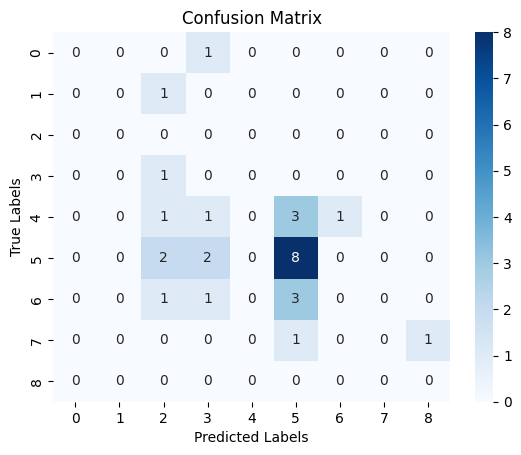

In [92]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Decision Tree


In [93]:
from sklearn.tree import DecisionTreeClassifier


# แยก features (X) และ target (Y) จาก df_train
X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, :1]['pH']

X_valid = df_valid.iloc[:, 1:]
Y_valid = df_valid.iloc[:, :1]

X_test = df_test.iloc[:, 1:]
Y_test = df_test.iloc[:, :1]

# สร้างโมเดล Decision Tree
model = DecisionTreeClassifier()

# ฝึกโมเดลด้วยชุด Train
model.fit(X_train, Y_train)

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด Validation

Y_pred = model.predict(X_test)


# Evaluating Model Decision Tree


In [94]:
# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(Y_test, Y_pred)

# แสดงผลลัพธ์
print(f"Decision Tree Accuracy: {accuracy}")


Decision Tree Accuracy: 0.35714285714285715


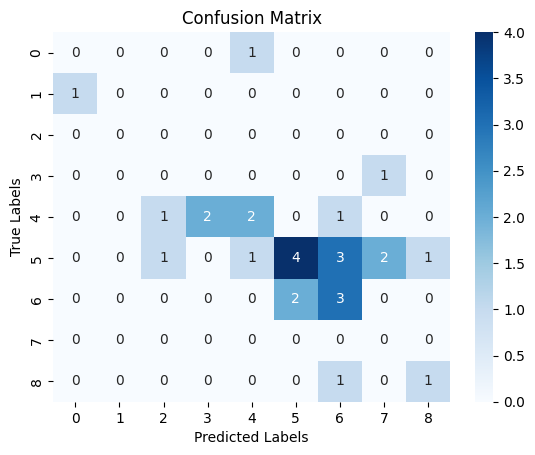

In [95]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
